<a href="https://colab.research.google.com/github/yuyangweng/Deep_Learning_Ittraining/blob/main/NN%E5%AF%A6%E4%BD%9CVAE_v0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#使用NN實作VAE

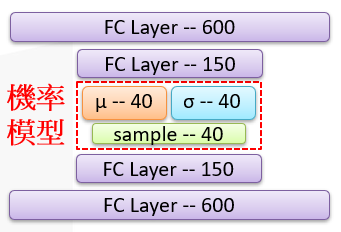

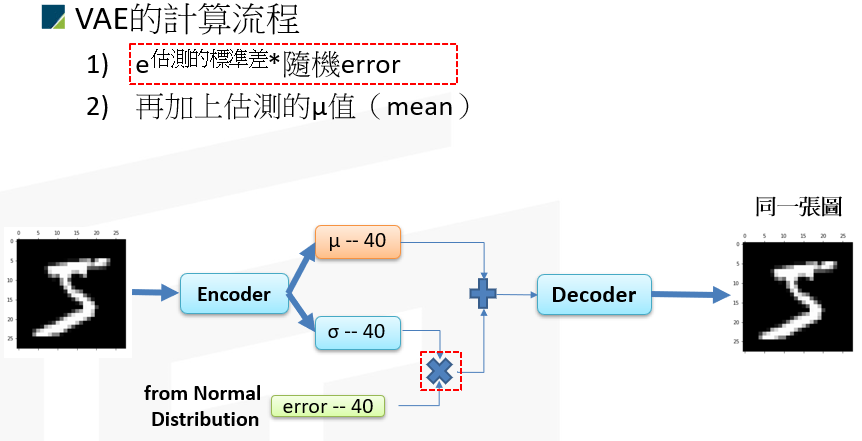

In [ ]:
import tensorflow as tf
print(f"Tensorflow Version={tf.__version__}")

import tensorflow.keras
print(f"tensorflow.keras Version={tensorflow.keras.__version__}")

#載入Dataset
from tensorflow.keras import datasets

(X_train, y_train),(X_test, y_test)= datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), 784))
X_test = X_test.reshape((len(X_test), 784))
#建立Model
latent_dim = 2

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        #從TF的Normal Distribution產生Error（此處稱為epsilon）
        epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)))
        #平均值+(e^標準差)*error
        return z_mean + tf.exp(0.2 * z_log_var) * epsilon

#建立輸入層
input_layer = layers.Input(shape=(28*28))

x=layers.Dense(units=128)(input_layer)

#VAE
#注意！第1次用到x
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
#注意！第2次用到x
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])

#前面部分為Encoder
model_encoder = models.Model(input_layer, z, name="model_encoder")

#後面部分為Decoder
encoded_input = layers.Input(shape=(latent_dim,))

x=layers.Dense(units=128)(encoded_input)
output_layer = layers.Dense(units=28*28)(x)

model_decoder = models.Model(encoded_input, output_layer,name='model_decoder')

#建立Autoencoder模型（指定輸入、輸出）
model_variational_autoencoder = models.Model(inputs=input_layer, outputs=model_decoder(model_encoder(input_layer)),name='model_variational_autoencoder')

# 最佳化設定
model_variational_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# 開始進行training
model_variational_autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=1,
    verbose=1,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)
model_encoder.summary()
model_variational_autoencoder.summary()
model_decoder.summary()



Tensorflow Version=2.5.0
tensorflow.keras Version=2.5.0
211/211 [==============================] - 4s 16ms/step - loss: 0.4444 - val_loss: 0.2994
Model: "model_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          100480      input_1[0][0]                    
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            258         dense[0][0]                      
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 

#實測

code=[-0.10568868 -0.13184612]
X_generate.shape=(2,)


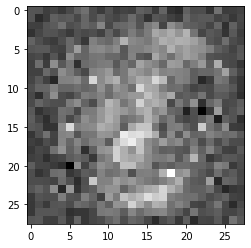

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#產生隨機normal distribution
mu, sigma = 0, 0.1
code = np.random.normal(loc=mu, scale=sigma, size=latent_dim)
print(f'code={code}')

#建立X_test
X_generate = np.array(code)
print(f'X_generate.shape={X_generate.shape}')
predict_images = model_decoder.predict(X_generate.reshape(-1,latent_dim))

#顯示黑底白字
plt.imshow(predict_images[0].reshape(28,28), cmap = plt.get_cmap('gray'))

#再train個10 epoch

In [ ]:
# 開始進行training
model_variational_autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=10,
    verbose=1,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)

Epoch 1/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2996 - val_loss: 0.2950
Epoch 2/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2910 - val_loss: 0.2910
Epoch 3/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2818 - val_loss: 0.2785
Epoch 4/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2767 - val_loss: 0.2747
Epoch 5/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2732 - val_loss: 0.2697
Epoch 6/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2699 - val_loss: 0.2705
Epoch 7/10
211/211 [==============================] - 3s 16ms/step - loss: 0.3033 - val_loss: 0.2679
Epoch 8/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2621 - val_loss: 0.2598
Epoch 9/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2565 - val_loss: 0.2522
Epoch 10/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2538 - val_lo

#實測

code=[-0.00755246 -0.05058912]
X_generate.shape=(2,)


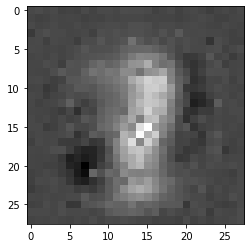

In [ ]:
import numpy as np

#產生隨機normal distribution
mu, sigma = 0, 0.1
code = np.random.normal(loc=mu, scale=sigma, size=latent_dim)
print(f'code={code}')

#建立X_test
X_generate = np.array(code)
print(f'X_generate.shape={X_generate.shape}')
predict_images = model_decoder.predict(X_generate.reshape(-1,latent_dim))

#顯示黑底白字
plt.imshow(predict_images[0].reshape(28,28), cmap = plt.get_cmap('gray'))

#再train個10 epoch

In [ ]:
# 開始進行training
model_variational_autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=10,
    verbose=1,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)

Epoch 1/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2499 - val_loss: 0.2510
Epoch 2/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2516 - val_loss: 0.2464
Epoch 3/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2547 - val_loss: 0.2472
Epoch 4/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2512 - val_loss: 0.2442
Epoch 5/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2456 - val_loss: 0.2453
Epoch 6/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2465 - val_loss: 0.2567
Epoch 7/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2446 - val_loss: 0.2414
Epoch 8/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2432 - val_loss: 0.2429
Epoch 9/10
211/211 [==============================] - 3s 15ms/step - loss: 0.2457 - val_loss: 0.2409
Epoch 10/10
211/211 [==============================] - 3s 16ms/step - loss: 0.2411 - val_lo

#實測

code=[-0.11756694 -0.04263268]
X_generate.shape=(2,)


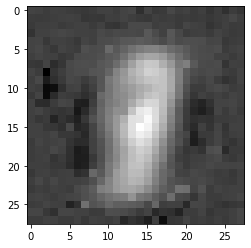

In [ ]:
import numpy as np

#產生隨機normal distribution
mu, sigma = 0, 0.1
code = np.random.normal(loc=mu, scale=sigma, size=latent_dim)
print(f'code={code}')

#建立X_test
X_generate = np.array(code)
print(f'X_generate.shape={X_generate.shape}')
predict_images = model_decoder.predict(X_generate.reshape(-1,latent_dim))

#顯示黑底白字
plt.imshow(predict_images[0].reshape(28,28), cmap = plt.get_cmap('gray'))

#此範例程式碼非重點，重點是從結果能看出數字間能有變化

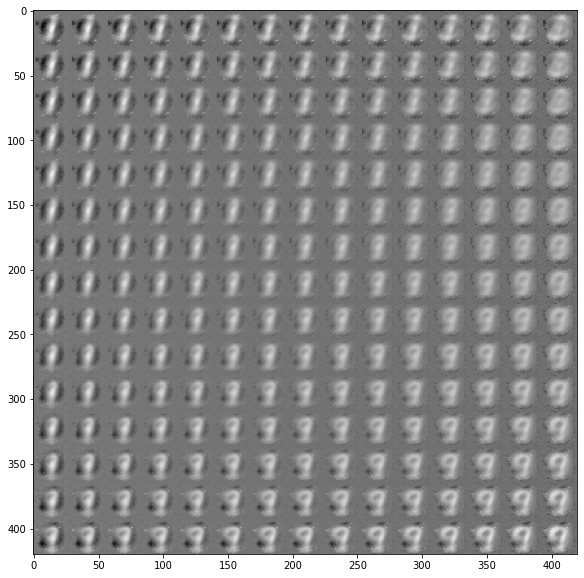

In [ ]:
#一共要顯示n*n的數字
n = 15
#每個數字大小
digit_size = 28
#產生一張大的空白圖
figure = np.zeros((digit_size * n, digit_size * n))

from scipy.stats import norm
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

#二個for迴圈構成長度為2的向量
#這就是為何前面設定latent_dim = 2
#由上至下
for i, yi in enumerate(grid_y):
    #由左至右
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = model_decoder.predict(z_sample)

        #底下二列僅繪圖用，非本門課程範圍
        #其原理就如同蓋印章般
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='gray')
plt.show()               